In [1]:
#加载样本数据
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']

In [2]:
x1 = np.array([100,50,100,100,50,80,75,65,90,90])   #Miles Travelled
x2 = np.array([4,3,4,2,2,2,3,4,3,2])    #Numbers of Deliveries
y = np.array([9.3,4.8,8.9,6.5,4.2,6.2,7.4,6.0,7.6,6.1])   #Travel Times
num = 10

In [3]:
#数据处理
X0 = np.ones(num)

X1 = (x1-x1.min())/(x1.max()-x1.min())
X2 = (x2-x2.min())/(x2.max()-x2.min())

X = np.stack((X0,X1,X2),axis=1)
Y = y.reshape(-1,1)

In [4]:
X.shape,Y.shape

((10, 3), (10, 1))

In [5]:
#设置超参数
learn_rate = 0.002
iter = 1000

display_step = 100

In [6]:
#设置模型参数初始值
np.random.seed(612)
W = np.random.randn(3,1)

In [7]:
#训练模型
mse = []
for i in range(0,iter+1):

    dL_dW = np.matmul(np.transpose(X),np.matmul(X,W)-Y)
    W = W-learn_rate * dL_dW
    
    PRED = np.matmul(X,W)
    Loss = np.mean(np.square(Y-PRED))/2
    mse.append(Loss)
    
    if i % display_step == 0:
        print("i: %i,Loss:%f"% (i,mse[i]))    

i: 0,Loss:28.228665
i: 100,Loss:0.211079
i: 200,Loss:0.153973
i: 300,Loss:0.140746
i: 400,Loss:0.132077
i: 500,Loss:0.126353
i: 600,Loss:0.122560
i: 700,Loss:0.120041
i: 800,Loss:0.118364
i: 900,Loss:0.117244
i: 1000,Loss:0.116496


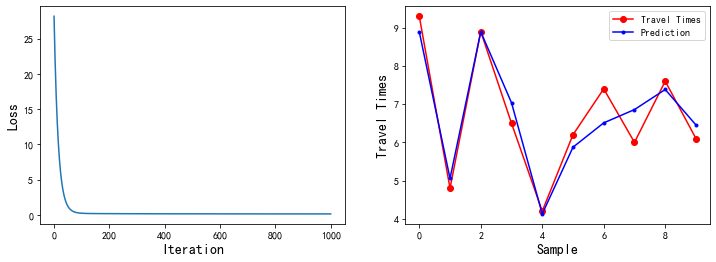

In [8]:
#结果可视化
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(mse)
plt.xlabel("Iteration",fontsize=14)
plt.ylabel('Loss',fontsize=14)

plt.subplot(1,2,2)
PRED = PRED.reshape(-1)
plt.plot(y,color="red",marker = 'o',label = "Travel Times")
plt.plot(PRED,color='blue',marker = '.',label = "Prediction")
plt.xlabel("Sample",fontsize=14)
plt.ylabel("Travel Times",fontsize=14)

plt.legend()
plt.show()